In [96]:
import numpy as np 
import pandas as pd
#import lightgbm as lgb
from numpy.random import normal, seed
import math
from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import pyplot
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats import norm
import scipy.stats as scs

#from fbprophet import Prophet

In [97]:
data_file='N:\\TESE\\Bullwhip\\data\\input\\data_amplified.csv'
input_data_df = pd.read_csv(data_file)
input_data_df

,value
0,101
1,103
2,104
3,104
4,103
...,...
5626,113
5627,113
5628,113
5629,113


In [98]:
print("shape",input_data_df.shape,
      "\n na:",input_data_df.isna().sum(),
      "\n zeros = {:.2f}".format(input_data_df.value[input_data_df.value==0].count()),
      "\n %zeros = {:.2f}".format(input_data_df.value[input_data_df.value==0].count()/input_data_df.shape[0]))


shape (5631, 1) 
 na: value    0
dtype: int64 
 zeros = 0.00 
 %zeros = 0.00


In [99]:
input_data_df.describe()

,value
count,5631.000000
mean,120.513230
std,15.977219
min,83.000000
25%,111.000000
50%,121.000000
75%,132.000000
max,160.000000


<AxesSubplot:>

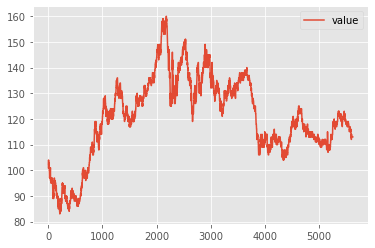

In [103]:
input_data_df.plot()

In [116]:
result = adfuller(input_data_df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.870766
p-value: 0.345936
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [102]:
input_data_df["value"]

0       101
1       103
2       104
3       104
4       103
       ... 
5626    113
5627    113
5628    113
5629    113
5630    113
Name: value, Length: 5631, dtype: int64

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df3.VWAP,lags=3, exog=df3[exogenous_features])
res = model.fit()
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))